In [121]:
import operator
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *
from numpy import linalg as la
import numpy as np
import scipy.linalg as SL
import numpy 
import pylab as pl
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle
import statsmodels.formula.api as smf
import datetime as dt
from scipy.stats.stats import pearsonr  
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from plotly.offline import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import plotly.graph_objs as go
import plotly.express as px
init_notebook_mode(connected=True)
from IPython.display import display, HTML, Markdown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [122]:
df=pd.read_csv("df.csv")

# Exploratory Data Analysis

In [123]:
display(HTML(df.head(5).to_html()))


,Aquifier_Diametre,Aquifier_Depth,Quality_Of_Water,Vegetation,Rocks,Soil_Type,Landuse,Water_availibility
0,ada_1,ade_3,7.35,veg_0,Rock_1,st_0,ld_2,low
1,ada_1,ade_3,7.79,veg_0,Rock_1,st_1,ld_2,low
2,ada_1,ade_3,7.81,veg_0,Rock_0,st_1,ld_1,low
3,ada_0,ade_3,7.76,veg_0,Rock_0,st_1,ld_1,low
4,ada_0,ade_3,8.49,veg_0,Rock_1,st_0,ld_2,low


### Dataset Information

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Aquifier_Diametre   4978 non-null   object 
 1   Aquifier_Depth      4978 non-null   object 
 2   Quality_Of_Water    4978 non-null   float64
 3   Vegetation          4978 non-null   object 
 4   Rocks               4978 non-null   object 
 5   Soil_Type           4978 non-null   object 
 6   Landuse             4978 non-null   object 
 7   Water_availibility  4978 non-null   object 
dtypes: float64(1), object(7)
memory usage: 311.2+ KB


In [125]:
print("Number of Rows:",df.shape[0])

Number of Rows: 4978


In [126]:
print("Number of Columns:",df.shape[1])

Number of Columns: 8


In [127]:
print("Column Names:",df.columns.values.tolist())

Column Names: ['Aquifier_Diametre', 'Aquifier_Depth', 'Quality_Of_Water', 'Vegetation', 'Rocks', 'Soil_Type', 'Landuse', 'Water_availibility']


In [128]:
print("Columns with Missing Values:",df.columns[df.isnull().any()].tolist())

Columns with Missing Values: []


## Column Analysis 

# What is an Aquifer?

An aquifer is an underground layer of water-bearing permeable rock, rock fractures or unconsolidated materials (gravel, sand, or silt).

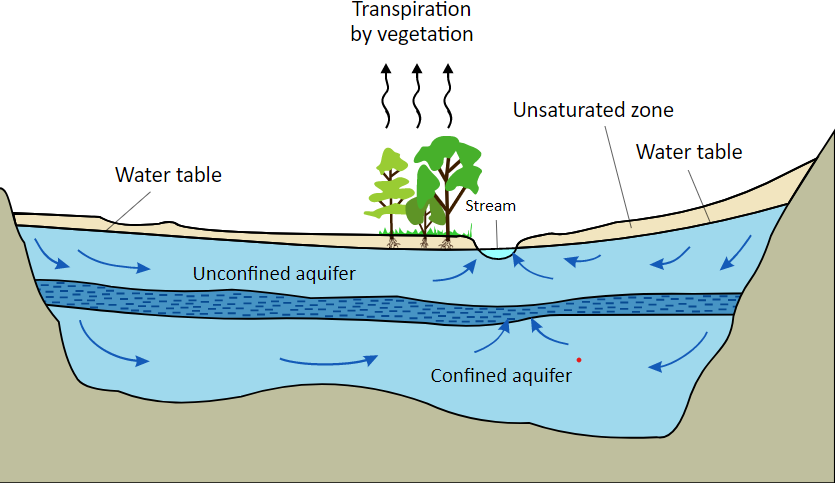

In [129]:
display(Markdown("""## *Aquifer Diametre*

 Aquifer Diametre represents the diametre of an available quifer. It is an nominal variable represented by four categories:
1. ada_0 : No Aquifer Found 
2. ada_1 : Aquifer Found with diameter between 15cm - 20 cm
3. ada_2 : Aquifer Found with diameter between 25cm - 35 cm
4. ada_3 : Aquifer Found with diameter between 40cm - 50 cm


 """))
                 
aquifier_diametre_value_counts = pd.DataFrame(df['Aquifier_Diametre'].value_counts().reset_index())
aquifier_diametre_value_counts.columns = ['Aquifier Diametre', 'Count']
aquifier_diametre_value_counts['Percentage'] = (aquifier_diametre_value_counts['Count']/4978) * 100
display(HTML(aquifier_diametre_value_counts.to_html()))
fig = px.bar(aquifier_diametre_value_counts, x="Aquifier Diametre", y="Count", color="Aquifier Diametre", title="Aquifier Diametre Bar Chart")
fig.show()
fig = px.pie(aquifier_diametre_value_counts, values='Percentage', names='Aquifier Diametre', title="Aquifier Diametre Pie Chart",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## *Aquifer Diametre*

 Aquifer Diametre represents the diametre of an available quifer. It is an nominal variable represented by four categories:
1. ada_0 : No Aquifer Found 
2. ada_1 : Aquifer Found with diameter between 15cm - 20 cm
3. ada_2 : Aquifer Found with diameter between 25cm - 35 cm
4. ada_3 : Aquifer Found with diameter between 40cm - 50 cm


 

,Aquifier Diametre,Count,Percentage
0,ada_2,2028,40.739253
1,ada_3,1624,32.623544
2,ada_1,718,14.423463
3,ada_0,608,12.213740


In [130]:
display(Markdown("""### *Aquifer Depth*

An aquifer depth represents the presence of aquifer at a designated altitude. A nominal variable represented by four categories:
1. ade_0: No Aquifer Found  
2. ade_1: Aquifer was found at the depth between 300m-400m  
3. ade_2: Aquifer was found at the depth between 200m-299m  
4. ade_3: Aquifer was found before 200m.  """))


aquifier_depth_value_counts = pd.DataFrame(df['Aquifier_Depth'].value_counts().reset_index())
aquifier_depth_value_counts.columns = ['Aquifier Depth', 'Count']
aquifier_depth_value_counts['Percentage'] = (aquifier_depth_value_counts['Count']/4978) * 100
display(HTML(aquifier_depth_value_counts.to_html()))
fig = px.bar(aquifier_depth_value_counts, x="Aquifier Depth", y="Count", color="Aquifier Depth", title="Aquifier Depth Bar Chart")
fig.show()
fig = px.pie(aquifier_depth_value_counts, values='Percentage', names='Aquifier Depth', title="Aquifier Depth Pie Chart",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### *Aquifer Depth*

An aquifer depth represents the presence of aquifer at a designated altitude. A nominal variable represented by four categories:
1. ade_0: No Aquifer Found  
2. ade_1: Aquifer was found at the depth between 300m-400m  
3. ade_2: Aquifer was found at the depth between 200m-299m  
4. ade_3: Aquifer was found before 200m.  

,Aquifier Depth,Count,Percentage
0,ade_2,2018,40.538369
1,ade_1,1634,32.824427
2,ade_3,1076,21.615106
3,ade_0,250,5.022097


In [131]:
display(Markdown("""### Water Availibity

Represents the underground water level at a particular location. It is an ordinal variable represented by three levels:
1. Low 
2. Medium
3. High

 """))

water_availibility_value_counts = pd.DataFrame(df['Water_availibility'].value_counts().reset_index())
water_availibility_value_counts.columns = ['Water Level', 'Count']
water_availibility_value_counts['Percentage'] = (water_availibility_value_counts['Count']/4978) * 100

display(HTML(water_availibility_value_counts.to_html()))
fig = px.bar(water_availibility_value_counts, x="Water Level", y="Count", color="Water Level", title="Water Level Bar Chart")
fig.show()
fig = px.pie(water_availibility_value_counts, values='Percentage', names='Water Level', title="Water Level Pie Chart",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Water Availibity

Represents the underground water level at a particular location. It is an ordinal variable represented by three levels:
1. Low 
2. Medium
3. High

 

,Water Level,Count,Percentage
0,moderate,2011,40.397750
1,high,1652,33.186018
2,low,1315,26.416231


In [132]:

display(Markdown("""#### Water Quality

Water Quality variable represents the quality of water. A continous variable lying between 6.5-8.5 pH: """))

fig = px.histogram(df, x="Quality_Of_Water", color ='Water_availibility')
fig.show()
display(Markdown("              The graph above represents the distribution of quality of water with the level of availibility"))

#### Water Quality

Water Quality variable represents the quality of water. A continous variable lying between 6.5-8.5 pH: 

              The graph above represents the distribution of quality of water with the level of availibility

In [133]:
display(Markdown("""#### Vegetation

Vegetation variable represents the type of vegetation above the aquifer. A nominal variable with three categories:
1. veg_0 : Dry Vegetation
2. veg_1 : Moist Vegetation
3. veg_2 : Wet Vegetation """))

vegetation_value_counts = pd.DataFrame(df['Vegetation'].value_counts().reset_index())
vegetation_value_counts.columns = ['Vegetation', 'Count']
vegetation_value_counts['Percentage'] = (vegetation_value_counts['Count']/4978) * 100
display(HTML(vegetation_value_counts.to_html()))
fig = px.bar(vegetation_value_counts, x="Vegetation", y="Count", color="Vegetation", title="Vegetation Bar Chart")
fig.show()
fig = px.pie(vegetation_value_counts, values='Percentage', names='Vegetation', title="vegetation Pie Chart",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

#### Vegetation

Vegetation variable represents the type of vegetation above the aquifer. A nominal variable with three categories:
1. veg_0 : Dry Vegetation
2. veg_1 : Moist Vegetation
3. veg_2 : Wet Vegetation 

,Vegetation,Count,Percentage
0,veg_1,1870,37.565287
1,veg_2,1782,35.797509
2,veg_0,1326,26.637204


In [134]:
display(Markdown("""#### Rocks Type

Rocks variable represents the type of rocks above the aquifer. A nominal variable with four categories:
1. Rocks_0 : Igneous Rocks
2. Rocks_1 : Sedimentary Rocks
3. Rocks_2 : Metamorphic Rocks
4. Rocks_3 : Water Permeable Rocks
"""))

rocks_value_counts = pd.DataFrame(df['Rocks'].value_counts().reset_index())
rocks_value_counts.columns = ['Rocks', 'Count']
rocks_value_counts['Percentage'] = (rocks_value_counts['Count']/4978) * 100
display(HTML(rocks_value_counts.to_html()))
fig = px.bar(rocks_value_counts, x="Rocks", y="Count", color="Rocks", title="Rocks Bar Chart")
fig.show()
fig = px.pie(rocks_value_counts, values='Percentage', names='Rocks', title="Rocks Pie Chart",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

#### Rocks Type

Rocks variable represents the type of rocks above the aquifer. A nominal variable with four categories:
1. Rocks_0 : Igneous Rocks
2. Rocks_1 : Sedimentary Rocks
3. Rocks_2 : Metamorphic Rocks
4. Rocks_3 : Water Permeable Rocks


,Rocks,Count,Percentage
0,Rock_2,2028,40.739253
1,Rock_3,1624,32.623544
2,Rock_1,714,14.343110
3,Rock_0,612,12.294094


In [135]:
display(Markdown("""#### Soil Type

Soil Type variable represents the type of soil above the aquifer. A nominal variable with four categories:
1. st_0 : Dry
2. st_1 : Wet Sand
3. st_2 : Clay
4. st_3 : Wet Mud
"""))

soils_value_counts = pd.DataFrame(df['Soil_Type'].value_counts().reset_index())
soils_value_counts.columns = ['Soil_Type', 'Count']
soils_value_counts['Percentage'] = (soils_value_counts['Count']/4978) * 100
display(HTML(soils_value_counts.to_html()))
fig = px.bar(soils_value_counts, x="Soil_Type", y="Count", color="Soil_Type", title="Soil Type Bar Chart")
fig.show()
fig = px.pie(soils_value_counts, values='Percentage', names='Soil_Type', title="Soil Type Pie Chart",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

#### Soil Type

Soil Type variable represents the type of soil above the aquifer. A nominal variable with four categories:
1. st_0 : Dry
2. st_1 : Wet Sand
3. st_2 : Clay
4. st_3 : Wet Mud


,Soil_Type,Count,Percentage
0,st_1,1670,33.547609
1,st_3,1590,31.940538
2,st_2,1046,21.012455
3,st_0,672,13.499397


In [136]:
display(Markdown("""#### Land Use

Land use variable represents the land usage above the aquifer. A nominal variable with three categories:
1. ld_0 : No Land Usage 
2. ld_1 : Mild Human Population Land Usage
3. ld_2 : Only Human Population Land Usage

"""))

landuse_value_counts = pd.DataFrame(df['Landuse'].value_counts().reset_index())
landuse_value_counts.columns = ['Landuse', 'Count']
landuse_value_counts['Percentage'] = (landuse_value_counts['Count']/4978) * 100
display(HTML(landuse_value_counts.to_html()))
fig = px.bar(landuse_value_counts, x="Landuse", y="Count", color="Landuse", title="Land Use Bar Chart")
fig.show()
fig = px.pie(landuse_value_counts, values='Percentage', names='Landuse', title="Land Use Pie Chart",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

#### Land Use

Land use variable represents the land usage above the aquifer. A nominal variable with three categories:
1. ld_0 : No Land Usage 
2. ld_1 : Mild Human Population Land Usage
3. ld_2 : Only Human Population Land Usage



,Landuse,Count,Percentage
0,ld_0,2626,52.752109
1,ld_1,1701,34.170350
2,ld_2,651,13.077541


## Relationship between Variables 

In [137]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [138]:
columns_list = ['Aquifier_Diametre', 'Aquifier_Depth', 'Vegetation', 'Rocks', 'Soil_Type', 'Landuse']
for column in columns_list:
    print("\n")
    heading = "#### " + column + " and Water Availibility "
    display(Markdown(heading))
    data_crosstab = pd.crosstab(df['Water_availibility'], df[column], margins = False) 
    stat, p, dof, expected = chi2_contingency(data_crosstab)
    display(data_crosstab)
    print("\nDegree of Freedom:", dof)
     # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
     # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

#### Aquifier_Diametre and Water Availibility 

Aquifier_Diametre,ada_0,ada_1,ada_2,ada_3
Water_availibility,,,,
high,33,36,40,1543
low,546,642,63,64
moderate,29,40,1925,17



Degree of Freedom: 6
probability=0.950, critical=12.592, stat=8031.512
significance=0.050, p=0.000
Dependent (reject H0)




#### Aquifier_Depth and Water Availibility 

Aquifier_Depth,ade_0,ade_1,ade_2,ade_3
Water_availibility,,,,
high,0,1526,57,69
low,250,64,63,938
moderate,0,44,1898,69



Degree of Freedom: 6
probability=0.950, critical=12.592, stat=7826.127
significance=0.050, p=0.000
Dependent (reject H0)




#### Vegetation and Water Availibility 

Vegetation,veg_0,veg_1,veg_2
Water_availibility,,,
high,69,793,790
low,1188,72,55
moderate,69,1005,937



Degree of Freedom: 4
probability=0.950, critical=9.488, stat=3713.086
significance=0.050, p=0.000
Dependent (reject H0)




#### Rocks and Water Availibility 

Rocks,Rock_0,Rock_1,Rock_2,Rock_3
Water_availibility,,,,
high,37,32,40,1543
low,547,641,63,64
moderate,28,41,1925,17



Degree of Freedom: 6
probability=0.950, critical=12.592, stat=8031.797
significance=0.050, p=0.000
Dependent (reject H0)




#### Soil_Type and Water Availibility 

Soil_Type,st_0,st_1,st_2,st_3
Water_availibility,,,,
high,38,47,58,1509
low,604,613,34,64
moderate,30,1010,954,17



Degree of Freedom: 6
probability=0.950, critical=12.592, stat=5948.072
significance=0.050, p=0.000
Dependent (reject H0)




#### Landuse and Water Availibility 

Landuse,ld_0,ld_1,ld_2
Water_availibility,,,
high,1564,58,30
low,90,638,587
moderate,972,1005,34



Degree of Freedom: 4
probability=0.950, critical=9.488, stat=3125.046
significance=0.050, p=0.000
Dependent (reject H0)


#### Quality of Water ( Less than 7)

In [139]:
print(df[df.Quality_Of_Water<7.0].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 24 to 4974
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Aquifier_Diametre   533 non-null    object 
 1   Aquifier_Depth      533 non-null    object 
 2   Quality_Of_Water    533 non-null    float64
 3   Vegetation          533 non-null    object 
 4   Rocks               533 non-null    object 
 5   Soil_Type           533 non-null    object 
 6   Landuse             533 non-null    object 
 7   Water_availibility  533 non-null    object 
dtypes: float64(1), object(7)
memory usage: 37.5+ KB
None


#### Quality of Water ( Greater than 7)

In [140]:
print(df[df.Quality_Of_Water>7.0].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4426 entries, 0 to 4977
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Aquifier_Diametre   4426 non-null   object 
 1   Aquifier_Depth      4426 non-null   object 
 2   Quality_Of_Water    4426 non-null   float64
 3   Vegetation          4426 non-null   object 
 4   Rocks               4426 non-null   object 
 5   Soil_Type           4426 non-null   object 
 6   Landuse             4426 non-null   object 
 7   Water_availibility  4426 non-null   object 
dtypes: float64(1), object(7)
memory usage: 311.2+ KB
None


In [141]:
display(Markdown("# Feature Engineering and Selection "))
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
display(Markdown("### Transforming Nominal Features "))


# Feature Engineering and Selection 

### Transforming Nominal Features 

In [171]:
columns_list = ['Aquifier_Diametre', 'Aquifier_Depth', 'Vegetation', 'Rocks', 'Soil_Type', 'Landuse']
dataframes = []
for column in columns_list:
    gle = LabelEncoder()
    labels = gle.fit_transform(df[column])
    mappings = {index: label for index, label in enumerate(gle.classes_)}
    column_name = column+"_labels"
    df[column_name] = labels
    ohe = OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[column_name]]).toarray()
    feature_labels = [column + "_" +str(cls_label) for cls_label in gle.classes_]
    dataframe_features = pd.DataFrame(feature_arr, columns=feature_labels)
    from sklearn.feature_selection import VarianceThreshold
    vt = VarianceThreshold(threshold=.15)
    vt.fit(dataframe_features )
    display(pd.DataFrame({'variance': vt.variances_,
     'select_feature': vt.get_support()},
     index=dataframe_features.columns).T)
    dataframe_subset =dataframe_features.iloc[:,vt.get_support()]
    dataframes.append(dataframe_subset)


VarianceThreshold(threshold=0.15)

,Aquifier_Diametre_ada_0,Aquifier_Diametre_ada_1,Aquifier_Diametre_ada_2,Aquifier_Diametre_ada_3
variance,0.10722,0.123431,0.241424,0.219806
select_feature,False,False,True,True


VarianceThreshold(threshold=0.15)

,Aquifier_Depth_ade_0,Aquifier_Depth_ade_1,Aquifier_Depth_ade_2,Aquifier_Depth_ade_3
variance,0.0476988,0.2205,0.241048,0.16943
select_feature,False,True,True,True


VarianceThreshold(threshold=0.15)

,Vegetation_veg_0,Vegetation_veg_1,Vegetation_veg_2
variance,0.195418,0.234538,0.229829
select_feature,True,True,True


VarianceThreshold(threshold=0.15)

,Rocks_Rock_0,Rocks_Rock_1,Rocks_Rock_2,Rocks_Rock_3
variance,0.107826,0.122859,0.241424,0.219806
select_feature,False,False,True,True


VarianceThreshold(threshold=0.15)

,Soil_Type_st_0,Soil_Type_st_1,Soil_Type_st_2,Soil_Type_st_3
variance,0.116771,0.222932,0.165972,0.217386
select_feature,False,True,True,True


VarianceThreshold(threshold=0.15)

,Landuse_ld_0,Landuse_ld_1,Landuse_ld_2
variance,0.249243,0.224942,0.113673
select_feature,True,True,False


In [172]:
concatenated_dataframes= pd.concat(dataframes, axis=1)
final_concat = pd.concat([df, concatenated_dataframes], axis =1 )

In [173]:
final_concat.head(5)

,Aquifier_Diametre,Aquifier_Depth,Quality_Of_Water,Vegetation,Rocks,Soil_Type,Landuse,Water_availibility,Aquifier_Diametre_labels,Aquifier_Depth_labels,...,Vegetation_veg_0,Vegetation_veg_1,Vegetation_veg_2,Rocks_Rock_2,Rocks_Rock_3,Soil_Type_st_1,Soil_Type_st_2,Soil_Type_st_3,Landuse_ld_0,Landuse_ld_1
0,ada_1,ade_3,7.35,veg_0,Rock_1,st_0,ld_2,low,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ada_1,ade_3,7.79,veg_0,Rock_1,st_1,ld_2,low,1,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,ada_1,ade_3,7.81,veg_0,Rock_0,st_1,ld_1,low,1,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,ada_0,ade_3,7.76,veg_0,Rock_0,st_1,ld_1,low,0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,ada_0,ade_3,8.49,veg_0,Rock_1,st_0,ld_2,low,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
gen_ord_map = {'low': 1, 'moderate': 2, 'high': 3}

df['Water_Availibility_Label'] = df['Water_availibility'].map(gen_ord_map)


In [176]:
df['Water_Availibility_Label'].value_counts()

2    2011
3    1652
1    1315
Name: Water_Availibility_Label, dtype: int64

In [178]:
final_concat.columns

Index(['Aquifier_Diametre', 'Aquifier_Depth', 'Quality_Of_Water', 'Vegetation',
       'Rocks', 'Soil_Type', 'Landuse', 'Water_availibility',
       'Aquifier_Diametre_labels', 'Aquifier_Depth_labels',
       'Vegetation_labels', 'Rocks_labels', 'Soil_Type_labels',
       'Landuse_labels', 'Water_Availibility_Label', 'Aquifier_Diametre_ada_2',
       'Aquifier_Diametre_ada_3', 'Aquifier_Depth_ade_1',
       'Aquifier_Depth_ade_2', 'Aquifier_Depth_ade_3', 'Vegetation_veg_0',
       'Vegetation_veg_1', 'Vegetation_veg_2', 'Rocks_Rock_2', 'Rocks_Rock_3',
       'Soil_Type_st_1', 'Soil_Type_st_2', 'Soil_Type_st_3', 'Landuse_ld_0',
       'Landuse_ld_1'],
      dtype='object')

In [179]:
features = final_concat[['Aquifier_Diametre_ada_2',
       'Aquifier_Diametre_ada_3', 'Aquifier_Depth_ade_1',
       'Aquifier_Depth_ade_2', 'Aquifier_Depth_ade_3', 'Vegetation_veg_0',
       'Vegetation_veg_1', 'Vegetation_veg_2', 'Rocks_Rock_2', 'Rocks_Rock_3',
       'Soil_Type_st_1', 'Soil_Type_st_2', 'Soil_Type_st_3', 'Landuse_ld_0',
       'Landuse_ld_1','Quality_Of_Water']]


In [180]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aquifier_Diametre_ada_2  4978 non-null   float64
 1   Aquifier_Diametre_ada_3  4978 non-null   float64
 2   Aquifier_Depth_ade_1     4978 non-null   float64
 3   Aquifier_Depth_ade_2     4978 non-null   float64
 4   Aquifier_Depth_ade_3     4978 non-null   float64
 5   Vegetation_veg_0         4978 non-null   float64
 6   Vegetation_veg_1         4978 non-null   float64
 7   Vegetation_veg_2         4978 non-null   float64
 8   Rocks_Rock_2             4978 non-null   float64
 9   Rocks_Rock_3             4978 non-null   float64
 10  Soil_Type_st_1           4978 non-null   float64
 11  Soil_Type_st_2           4978 non-null   float64
 12  Soil_Type_st_3           4978 non-null   float64
 13  Landuse_ld_0             4978 non-null   float64
 14  Landuse_ld_1            

In [181]:
target = df[['Water_Availibility_Label']]

In [183]:
from sklearn.model_selection  import train_test_split
# split the data with 50% in each set
X = np.array(features)
y = np.array(target)



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
y_train = y_train.ravel()
y_test = y_test.ravel()


(3484, 16) (1494, 16)
(3484, 1) (1494, 1)


In [184]:
y_train

array([3, 3, 2, ..., 2, 2, 1], dtype=int64)

In [185]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [186]:
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)
DTC_model = DecisionTreeClassifier()
GNB_model = GaussianNB()
LDA_model = LinearDiscriminantAnalysis()

In [187]:
display(Markdown("# Support Vetor Machine"))
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print(accuracy_score(SVC_prediction, y_test))
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(SVC_prediction, y_test))

# Support Vetor Machine

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.929718875502008
[[356  20  27]
 [ 16 571  13]
 [ 24   5 462]]
              precision    recall  f1-score   support

           1       0.90      0.88      0.89       403
           2       0.96      0.95      0.95       600
           3       0.92      0.94      0.93       491

    accuracy                           0.93      1494
   macro avg       0.93      0.93      0.93      1494
weighted avg       0.93      0.93      0.93      1494



In [188]:
display(Markdown("# K Nearest Neighbours"))
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
print(accuracy_score(KNN_prediction, y_test))
print(confusion_matrix(KNN_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

# K Nearest Neighbours

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.929718875502008
[[356  20  27]
 [ 16 571  13]
 [ 24   5 462]]
              precision    recall  f1-score   support

           1       0.90      0.88      0.89       403
           2       0.96      0.95      0.95       600
           3       0.92      0.94      0.93       491

    accuracy                           0.93      1494
   macro avg       0.93      0.93      0.93      1494
weighted avg       0.93      0.93      0.93      1494



In [189]:
display(Markdown("# Decision Tree Classifier"))
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)
DTC_prediction = DTC_model.predict(X_test)
print(accuracy_score(DTC_prediction, y_test))
print(confusion_matrix(DTC_prediction, y_test))
print(classification_report(DTC_prediction, y_test))


# Decision Tree Classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.9082998661311914
[[356  34  34]
 [ 16 548  15]
 [ 24  14 453]]
              precision    recall  f1-score   support

           1       0.90      0.84      0.87       424
           2       0.92      0.95      0.93       579
           3       0.90      0.92      0.91       491

    accuracy                           0.91      1494
   macro avg       0.91      0.90      0.90      1494
weighted avg       0.91      0.91      0.91      1494



In [190]:
display(Markdown("# Gaussian Naive Bayes"))
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
GNB_prediction = GNB_model.predict(X_test)
print(accuracy_score(GNB_prediction, y_test))
print(confusion_matrix(GNB_prediction, y_test))
print(classification_report(GNB_prediction, y_test))

# Gaussian Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09)

0.929718875502008
[[356  20  27]
 [ 16 571  13]
 [ 24   5 462]]
              precision    recall  f1-score   support

           1       0.90      0.88      0.89       403
           2       0.96      0.95      0.95       600
           3       0.92      0.94      0.93       491

    accuracy                           0.93      1494
   macro avg       0.93      0.93      0.93      1494
weighted avg       0.93      0.93      0.93      1494



In [192]:
display(Markdown("# XgBoost"))
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
xgboost_prediction = model.predict(X_test)
print(accuracy_score(xgboost_prediction, y_test))
print(confusion_matrix(xgboost_prediction, y_test))
print(classification_report(xgboost_prediction, y_test))

# XgBoost

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

0.929718875502008
[[356  20  27]
 [ 16 571  13]
 [ 24   5 462]]
              precision    recall  f1-score   support

           1       0.90      0.88      0.89       403
           2       0.96      0.95      0.95       600
           3       0.92      0.94      0.93       491

    accuracy                           0.93      1494
   macro avg       0.93      0.93      0.93      1494
weighted avg       0.93      0.93      0.93      1494

